In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Bandit:
  def __init__(self, m):
    self.m = m
    self.mean = 0  # This is Q(A)
    self.N = 0     # This is N(A)

  def pull(self):
    return np.random.randn() + self.m

  def update(self, reward):
    self.N += 1
    self.mean = self.mean + (1 / self.N) * (reward - self.mean)

In [3]:
def run_experiment(true_mean1, true_mean2, true_mean3, epsilon, num_trials):
    """
    Run an epsilon-greedy experiment with 3 bandits.

    Parameters:
    - true_mean1, true_mean2, true_mean3: The true mean rewards of the 3 bandits
    - epsilon: The probability of selecting a random action (exploration)
    - num_trials: The total number of times to pull a bandit

    Returns:
    - cumulative_average: Array of average reward values over time
    """
    
    # Initialize the 3 bandits with their respective true means
    bandits = [Bandit(true_mean1), Bandit(true_mean2), Bandit(true_mean3)]

    # Array to store the reward at each time step
    rewards = np.empty(num_trials)
    
    for trial in range(num_trials):
        # Epsilon-greedy action selection
        if np.random.random() < epsilon:
            action = np.random.choice(3)  # Explore: random action
        else:
            # Exploit: choose the bandit with the highest current estimated mean
            action = np.argmax([bandit.mean for bandit in bandits])
        
        # Pull the selected bandit to get a reward
        reward = bandits[action].pull()

        # Update the estimated value of the selected bandit
        bandits[action].update(reward)

        # Store the reward for plotting
        rewards[trial] = reward
    
    # Compute the cumulative average reward over time
    cumulative_average = np.cumsum(rewards) / (np.arange(num_trials) + 1)

    return cumulative_average

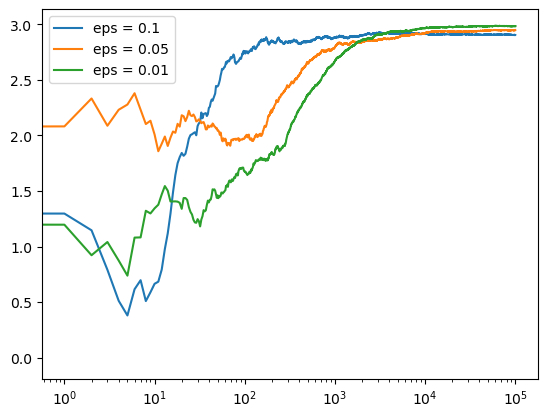

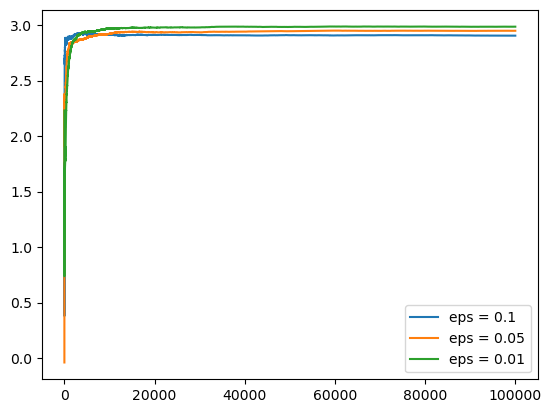

In [4]:
if __name__ == '__main__':
  c_1 = run_experiment(1.0, 2.0, 3.0, 0.1, 100000)
  c_05 = run_experiment(1.0, 2.0, 3.0, 0.05, 100000)
  c_01 = run_experiment(1.0, 2.0, 3.0, 0.01, 100000)

  # log scale plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(c_05, label='eps = 0.05')
  plt.plot(c_01, label='eps = 0.01')
  plt.legend()
  plt.xscale('log')
  plt.show()


  # linear plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(c_05, label='eps = 0.05')
  plt.plot(c_01, label='eps = 0.01')
  plt.legend()
  plt.show()
